In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
dataset = pd.read_csv(r"d:\Downloads\Churn_Modelling.csv")
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [23]:
X=dataset.iloc[:, 3:13]

In [24]:
Y=dataset.iloc[:,13]

In [25]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [26]:
geography=pd.get_dummies(X["Geography"])

In [27]:
geography

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False


In [28]:
geography=pd.get_dummies(X["Geography"],drop_first=True)

In [29]:
geography

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [30]:
gender=pd.get_dummies(X["Gender"],drop_first=True)

In [31]:
gender

,Male
0,False
1,False
2,False
3,False
4,False
...,...
9995,True
9996,True
9997,False
9998,True


In [32]:
X=pd.concat([X,geography,gender],axis=1)

In [33]:
X=X.drop(['Geography','Gender'],axis=1)

In [34]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state= 0 )

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, Y_train)
y_pred_lr = lr.predict(X_test)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)



c:\Users\Shivram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score
lr_accuracy = accuracy_score(Y_test, y_pred_lr)
print("logistic regression accuracy:",lr_accuracy)
rf_accuracy=accuracy_score(y_pred_rf,Y_test)
print("random forest accuracy:",rf_accuracy)

logistic regression accuracy: 0.808
random forest accuracy: 0.866


In [38]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, Y_train)
y_pred_lr = lr.predict(X_test)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)


In [39]:
print("logistic regression")
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print(coeff_df)
print("\n random forest")
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\n",rf_importance)

logistic regression
            Feature  Coefficient
1               Age     0.751746
8           Germany     0.355364
3           Balance     0.154088
9             Spain     0.047838
7   EstimatedSalary     0.029165
5         HasCrCard    -0.023623
0       CreditScore    -0.072306
2            Tenure    -0.081290
4     NumOfProducts    -0.084300
10             Male    -0.269198
6    IsActiveMember    -0.518268

 random forest

             Feature  Importance
1               Age    0.238901
7   EstimatedSalary    0.148789
3           Balance    0.143677
0       CreditScore    0.141997
4     NumOfProducts    0.131161
2            Tenure    0.080119
6    IsActiveMember    0.036838
8           Germany    0.026714
10             Male    0.018865
5         HasCrCard    0.018585
9             Spain    0.014354


In [40]:
#ann

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, Dropout


In [42]:
classifier = Sequential()
classifier.add(Dense(units = 10, kernel_initializer = 'he_normal', activation = 'relu', input_dim = 11))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 20, kernel_initializer = 'he_normal', activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 15, kernel_initializer = 'he_normal', activation = 'relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

c:\Users\Shivram\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model_history = classifier.fit(X_train, Y_train, validation_split=0.33, batch_size=10, epochs=100)


Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5048 - loss: 1.5264 - val_accuracy: 0.7940 - val_loss: 0.5739
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6645 - loss: 0.8510 - val_accuracy: 0.7955 - val_loss: 0.5384
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7227 - loss: 0.7187 - val_accuracy: 0.7955 - val_loss: 0.5273
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7444 - loss: 0.6394 - val_accuracy: 0.7955 - val_loss: 0.5187
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7625 - loss: 0.6062 - val_accuracy: 0.7955 - val_loss: 0.5124
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7666 - loss: 0.5783 - val_accuracy: 0.7955 - val_loss: 0.5080
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7776 - loss: 0.5609 - val_accuracy: 0.7955 - val_loss: 0.5062
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7848 - loss: 0.5427 - val_accu

In [48]:
classifier.save('churnmodel_ann.h5')

In [49]:
from tensorflow.keras.models import load_model
classifier=load_model('churnmodel_ann.h5')

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm_lr = confusion_matrix(Y_test, y_pred_lr)
cm_rf = confusion_matrix(Y_test, y_pred_rf)
y_prob = classifier.predict(X_test)
y_pred = (y_prob > 0.3).astype(int)
print("nn accuracy:")
print(model_history.history['accuracy'][-1])
print("Confusion Matrix - neural network:")
cm_nn = confusion_matrix(Y_test, y_pred)
print(cm_nn)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
nn accuracy:
0.8053741455078125
Confusion Matrix - neural network:
[[1545   50]
 [ 288  117]]


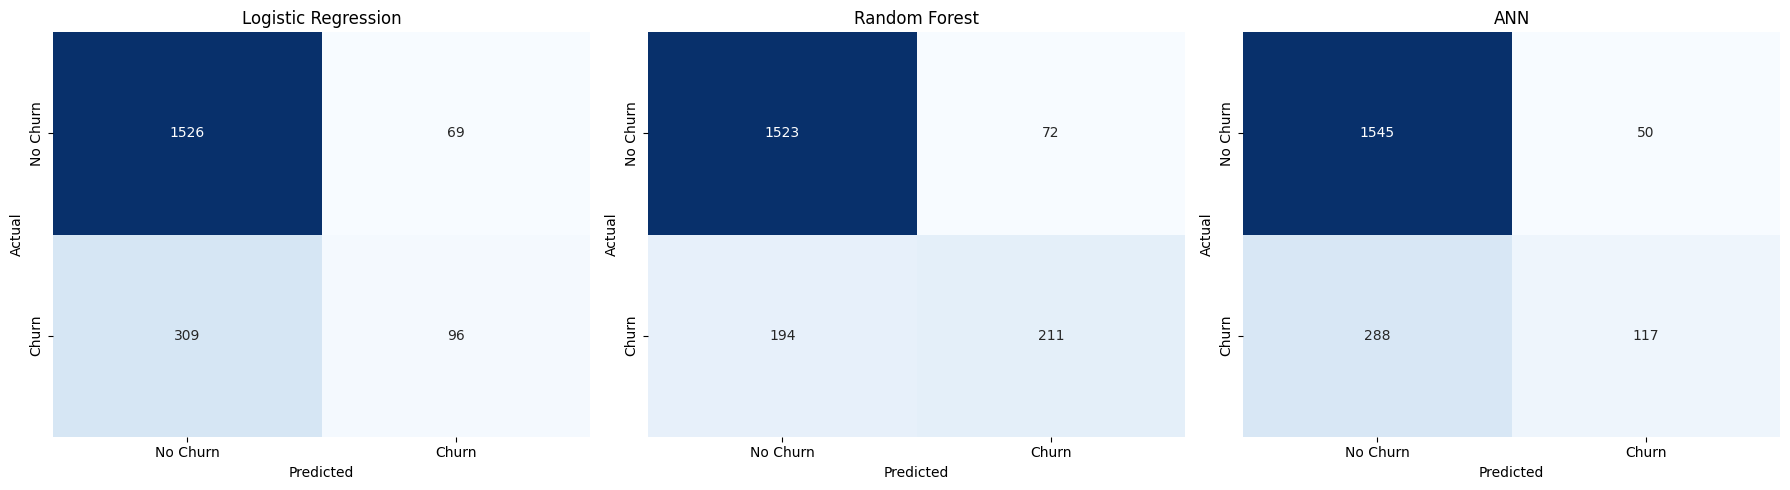

In [55]:
#confusion matrix visualization
import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
models = ['Logistic Regression', 'Random Forest', 'ANN']
cms = [cm_lr, cm_rf, cm_nn]
for ax, cm, title in zip(axes, cms, models):
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        cbar=False,
        ax=ax,
        xticklabels=['No Churn', 'Churn'],
        yticklabels=['No Churn', 'Churn']
    )
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()
